In [24]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dropout, Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization
from keras.optimizers import rmsprop_v2
from keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np

In [25]:
def create_model(num_classes):
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(100,100,1), activation="relu"))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (5, 5), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64, (3, 3), activation="relu"))
    model.add(Conv2D(64, (3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(512, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation="softmax"))
    model.compile(optimizer=rmsprop_v2.RMSProp(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

In [26]:
batch_size = 32

train_data = tf.keras.utils.image_dataset_from_directory(
    'dataset/',
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(100,100),
    batch_size=batch_size,
    color_mode='grayscale',
    shuffle=True,
)

val_data = tf.keras.utils.image_dataset_from_directory(
    'dataset/',
    image_size=(100,100),
    validation_split=0.2,
    color_mode='grayscale',
    batch_size=batch_size,
    subset='validation',
    shuffle=True,
    seed=123
)

Found 10071 files belonging to 19 classes.
Using 8057 files for training.
Found 10071 files belonging to 19 classes.
Using 2014 files for validation.


In [37]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

In [28]:
learning_model = create_model(num_classes=19)

In [38]:
epochs = 10
learning_model.summary()
history = learning_model.fit(train_data,steps_per_epoch=len(train_data),validation_data=val_data,validation_steps=len(val_data),epochs=epochs, callbacks=[learning_rate_reduction])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 96, 96, 32)        832       
                                                                 
 batch_normalization_2 (Batc  (None, 96, 96, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_9 (Conv2D)           (None, 92, 92, 32)        25632     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 46, 46, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 44, 44, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 42, 42, 64)       

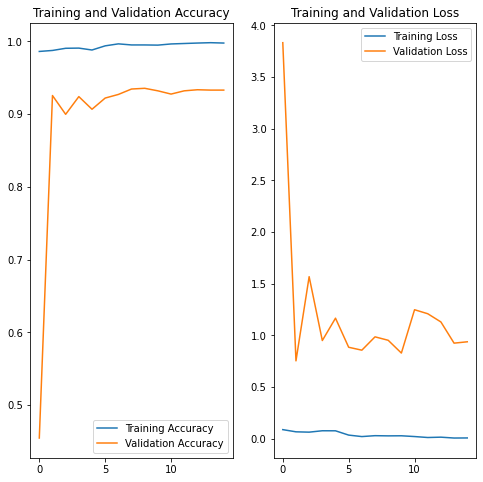

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [65]:
image = tf.keras.preprocessing.image.load_img('20.jpg', color_mode='grayscale')
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
learning_model.predict(input_arr)

array([[2.8706900e-33, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.8171886e-14, 0.0000000e+00, 1.0547781e-28, 7.8126381e-33,
        0.0000000e+00, 4.5410924e-09, 8.0645782e-17, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        9.6628850e-36, 1.5844436e-27, 0.0000000e+00]], dtype=float32)